Housing in United State

Aim of the project
1. To determine whether sales price are influenced more by property size and/or location

Objectives
1. To determine which state has the most expensive real estate market
2. To determine if there is a relationship between home size and price

In [8]:
#Import Libraries
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
#Import Data
df = pd.read_csv("data/realtor-data.csv")

In [10]:
#Inspect DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [11]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


Cleaning the dataset, inorder to determine if sale prices are influenced more by property size or location
i would be picking relevant columns and dropping others

In [12]:
df.drop(columns=["brokered_by", "status", "street", "city", "zip_code", "prev_sold_date", "bed", "bath"], inplace=True)

In [13]:
df.head()

,price,acre_lot,state,house_size
0,105000.0,0.12,Puerto Rico,920.0
1,80000.0,0.08,Puerto Rico,1527.0
2,67000.0,0.15,Puerto Rico,748.0
3,145000.0,0.10,Puerto Rico,1800.0
4,65000.0,0.05,Puerto Rico,NaN


looking at the dataset i have now, there seem to be two conflicting colums which are "acre_lot" and "house_size".
so in order to determine which of them is relevant to my goal i would be checking thier correlation with price.

In [14]:
df["price"].corr(df["acre_lot"])

0.01616566777370421

In [15]:
df["price"].corr(df["house_size"])

0.0002540961460627248

From the results above it can be seen that there seem to be a correlation between "price" and "acre_lot" than that of "price" and "house_size". so i would be dropping "house_size"

In [16]:
df.drop(columns=["house_size"], inplace=True)

now i proceed to dropping NAN values before proceeding to further cleaning

In [17]:
df.dropna(how="any", inplace=True)
df.head()

,price,acre_lot,state
0,105000.0,0.12,Puerto Rico
1,80000.0,0.08,Puerto Rico
2,67000.0,0.15,Puerto Rico
3,145000.0,0.10,Puerto Rico
4,65000.0,0.05,Puerto Rico


assigning price to the variable name price_in_USD and converting the dtype to int

In [18]:
df["price_in_USD"] = df["price"].astype(int)

In [19]:
df

,price,acre_lot,state,price_in_USD
0,105000.0,0.12,Puerto Rico,105000
1,80000.0,0.08,Puerto Rico,80000
2,67000.0,0.15,Puerto Rico,67000
3,145000.0,0.10,Puerto Rico,145000
4,65000.0,0.05,Puerto Rico,65000
...,...,...,...,...
2226377,359900.0,0.33,Washington,359900
2226378,350000.0,0.10,Washington,350000
2226379,440000.0,0.50,Washington,440000
2226380,179900.0,0.09,Washington,179900


converting acre_lot to m2 and assigning it the variable "area_in_m2"

In [20]:
df["area_in_m2"] = (df["acre_lot"] * 4_046.86).astype(int)

In [21]:
df

,price,acre_lot,state,price_in_USD,area_in_m2
0,105000.0,0.12,Puerto Rico,105000,485
1,80000.0,0.08,Puerto Rico,80000,323
2,67000.0,0.15,Puerto Rico,67000,607
3,145000.0,0.10,Puerto Rico,145000,404
4,65000.0,0.05,Puerto Rico,65000,202
...,...,...,...,...,...
2226377,359900.0,0.33,Washington,359900,1335
2226378,350000.0,0.10,Washington,350000,404
2226379,440000.0,0.50,Washington,440000,2023
2226380,179900.0,0.09,Washington,179900,364


i can now drop unwanted columns

In [22]:
df.drop(columns=["price", "acre_lot"], inplace=True)

In [23]:
df

,state,price_in_USD,area_in_m2
0,Puerto Rico,105000,485
1,Puerto Rico,80000,323
2,Puerto Rico,67000,607
3,Puerto Rico,145000,404
4,Puerto Rico,65000,202
...,...,...,...
2226377,Washington,359900,1335
2226378,Washington,350000,404
2226379,Washington,440000,2023
2226380,Washington,179900,364


Next, i calculate the price for each square meter(m2) and assign it the variable
"price_per_m2"

In [24]:
df["price_per_m2"] = (df["price_in_USD"] / df["area_in_m2"]).round(0)

In [25]:
df.dropna(how="all")

,state,price_in_USD,area_in_m2,price_per_m2
0,Puerto Rico,105000,485,216.0
1,Puerto Rico,80000,323,248.0
2,Puerto Rico,67000,607,110.0
3,Puerto Rico,145000,404,359.0
4,Puerto Rico,65000,202,322.0
...,...,...,...,...
2226377,Washington,359900,1335,270.0
2226378,Washington,350000,404,866.0
2226379,Washington,440000,2023,217.0
2226380,Washington,179900,364,494.0


In [26]:
df["state"].value_counts()

state
California              204235
Texas                   188751
Florida                 186505
North Carolina           77504
New York                 73870
Georgia                  73288
Arizona                  69703
Pennsylvania             68982
Illinois                 62552
Virginia                 57698
Washington               55833
Ohio                     51706
Missouri                 41752
Minnesota                40307
New Jersey               39207
Tennessee                38190
Maryland                 37783
Michigan                 36626
South Carolina           34837
Oklahoma                 34430
Wisconsin                30892
Massachusetts            30430
Oregon                   27325
Colorado                 26745
Alabama                  25579
Kentucky                 23571
Louisiana                22531
Arkansas                 21566
Iowa                     21029
New Mexico               20195
Indiana                  17112
Idaho                    15913
Mi

satisfying my first objective which is "state that has the most expensive real estate market"

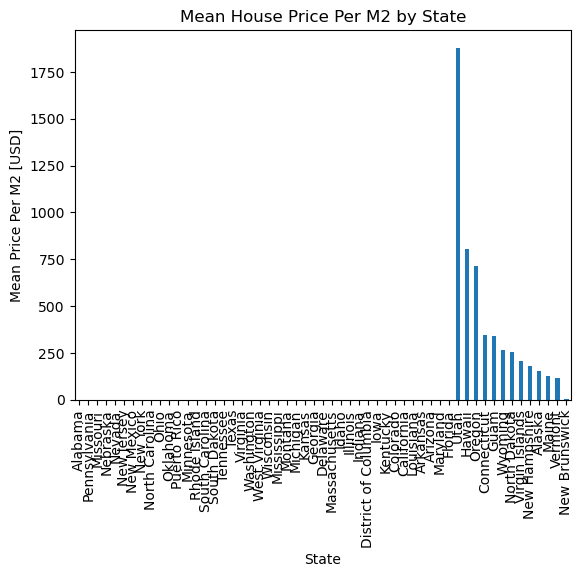

In [27]:
(
    df
    .groupby("state")
    ["price_per_m2"].mean()
    .sort_values(ascending=False)
    .plot(
        kind = "bar",
        xlabel = "State",
        ylabel = "Mean Price Per M2 [USD]",
        title = "Mean House Price Per M2 by State"        
    )
);

From the bar chart above it can be seen that "Utah" has the most expensive real estate market so i will be focusing there.

Another objective that needs to be sartisfied is "if there is a relationship between home size and price"

In [28]:
#Subset to Utah
df_utah = df[df["state"] == "Utah"]

In [29]:
df_utah.head()

,state,price_in_USD,area_in_m2,price_per_m2
1160935,Utah,249000,20234,12.0
1161129,Utah,48500,4613,11.0
1161132,Utah,48500,4451,11.0
1161133,Utah,48500,4046,12.0
1161134,Utah,48500,4087,12.0


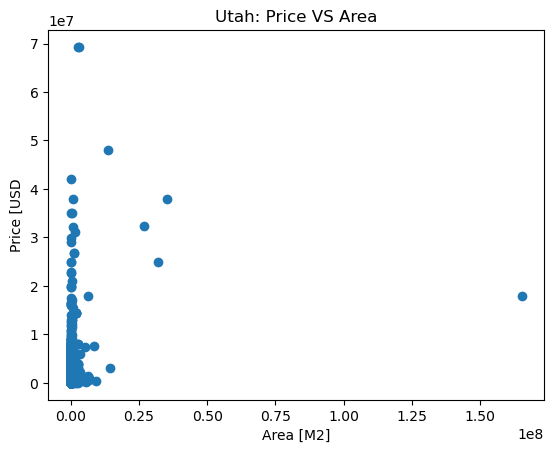

In [30]:
plt.scatter(x = df_utah["area_in_m2"], y = df_utah["price_in_USD"])
plt.xlabel("Area [M2]")
plt.ylabel("Price [USD")
plt.title("Utah: Price VS Area");

In [31]:
P_correlation = df_utah["area_in_m2"].corr(df_utah["price_in_USD"])
print(P_correlation)

0.1999765734521043


The result above shows a positive correlation. this means that there is a relationship
between home size and price

In [32]:
#Subseting a different Location
df_hawaii = df[df["state"] == "Hawaii"]

In [33]:
df_hawaii.head()

,state,price_in_USD,area_in_m2,price_per_m2
1359096,Hawaii,365000,6839,53.0
1359097,Hawaii,279000,4653,60.0
1359099,Hawaii,298000,7648,39.0
1359100,Hawaii,305000,33993,9.0
1359101,Hawaii,495000,21691,23.0


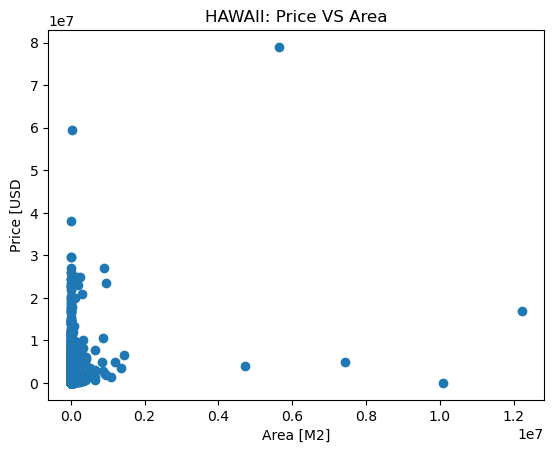

In [34]:
plt.scatter(x = df_hawaii["area_in_m2"], y = df_hawaii["price_in_USD"])
plt.xlabel("Area [M2]")
plt.ylabel("Price [USD")
plt.title("HAWAII: Price VS Area");

In [35]:
P_correlation = df_hawaii["area_in_m2"].corr(df_hawaii["price_in_USD"])
print(P_correlation)

0.1959398027602372


Conclusion:
in conclusion, from the previous diagram it can be seen that there is a weak positive correlation between "home size" and "price" this simply means that even though the size of the home is part of the factors that determine the price of the home, there are other factors that are also considered when 
determining the price of a home.
Also it can be said that both property size and location influence sales price and that "Utah" has the most expensive real estate market.